In [1]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [2]:
library(ggplot2)
library(ggthemes)
library(psych)


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



In [3]:
df = read.csv("../data/country_statistics_n46_20170511.csv")

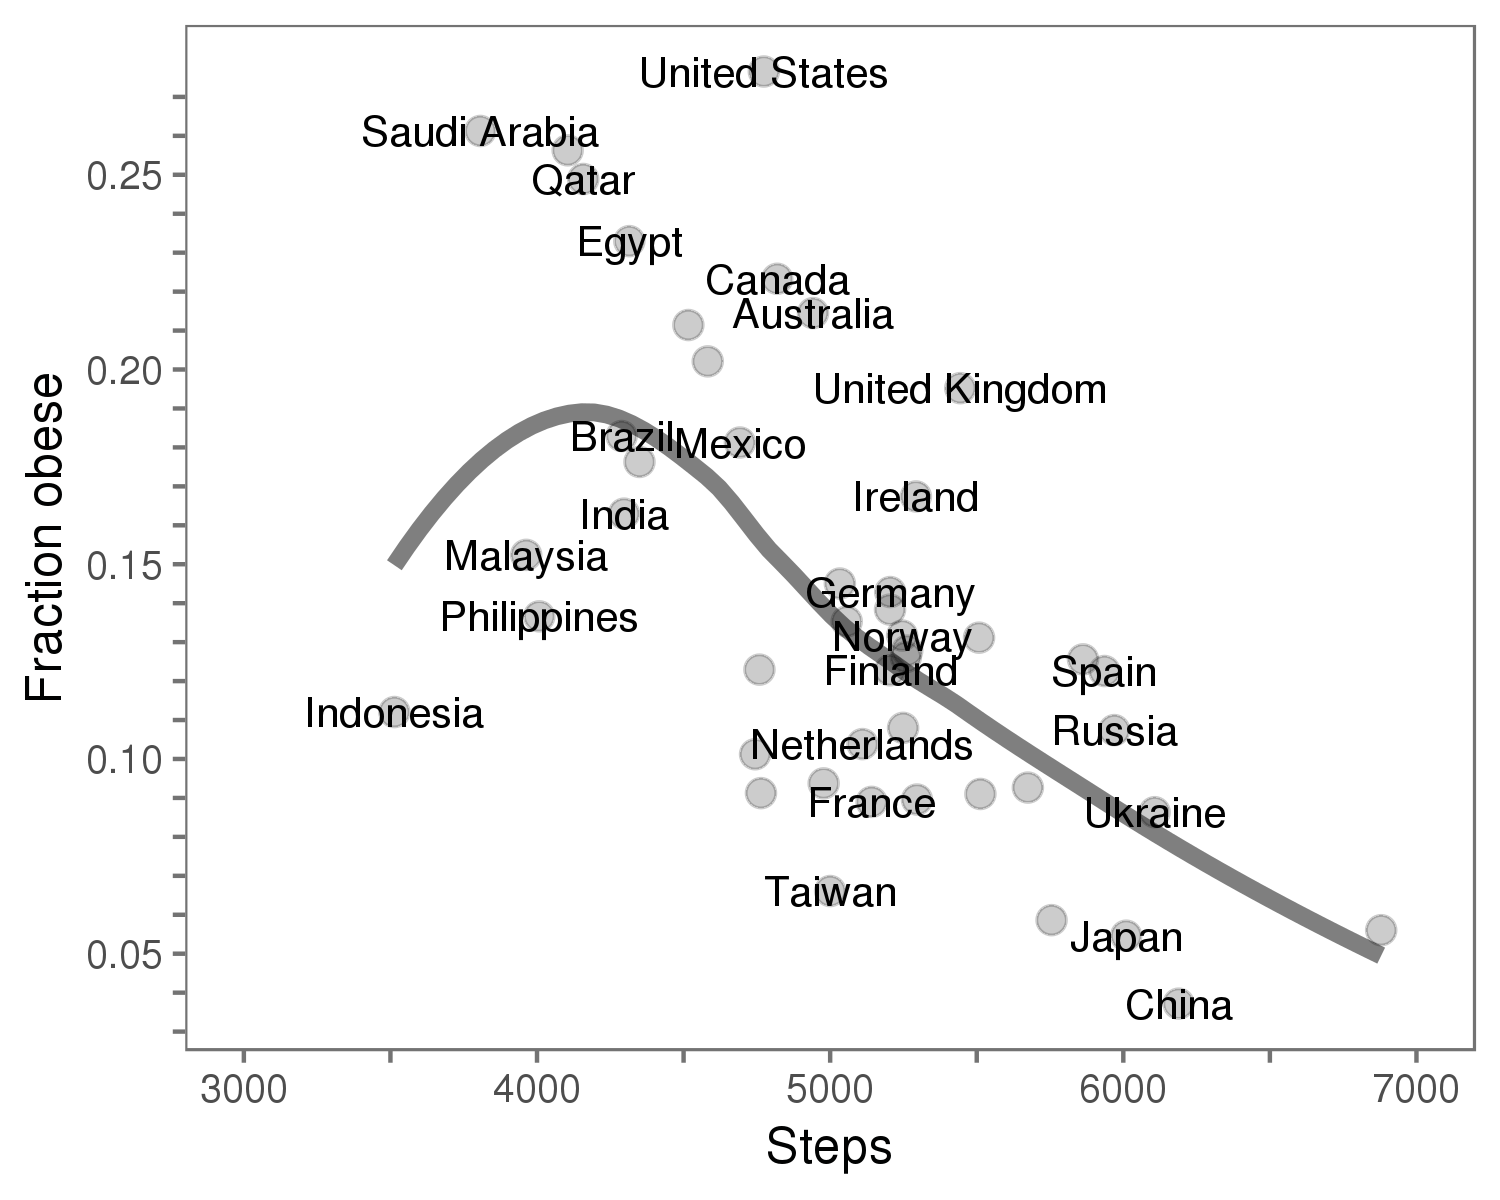

In [4]:
p <- ggplot(df, aes(steps_mean, obesity_mean, 
                   label=country))
p <- p + geom_smooth(aes(group=1), method="loess",span=.9,  se = F, size=2.0, color="gray50", alpha=1.0, method.args=list(family="symmetric"))
p <- p + geom_point(alpha=.2, size=3.0)
p <- p + geom_text(check_overlap = T, size=3.5)
p <- p + xlab("Steps") + ylab("Fraction obese")
p <- p + guides(color=FALSE) + guides(size=FALSE)
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + scale_colour_brewer(palette = "Set1")

# xticks
ticks = seq(3000,7000,by=500) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 2)] = sprintf("%.0f", ticks[seq(1, length(labels), 2)])
p <- p + scale_x_continuous(breaks=ticks, labels=labels, limits=c(3000,7000))
# yticks
ticks = seq(.00,.27,by=0.01) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 5)] = sprintf("%.2f", ticks[seq(1, length(labels), 5)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels)

p

ggsave(filename="../output/edfig6a.pdf", plot=p, width=4, height=3)

(a) Obesity is significantly correlated with the average number of daily steps in each country (LOESS fit; $R^2$ = 0.47). (b) However, activity inequality is the better predictor of obesity (LOESS fit; $R^2$ = 0.64). The difference is significant according to Steiger’s Z-Test (p < 0.01; Methods). 

In [5]:
# Correlation
cor.test(df$steps_mean, df$obesity_mean)


	Pearson's product-moment correlation

data:  df$steps_mean and df$obesity_mean
t = -5.2817, df = 44, p-value = 3.784e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7733559 -0.4060237
sample estimates:
       cor 
-0.6229016 


In [6]:
# R^2

#loess_fit
f = df$obesity_mean ~ df$steps_mean
loess.m <- loess(f, span=0.9, family="symmetric")
hat <- predict(loess.m)

(r_sq_loess <- cor(df$obesity_mean, hat)^2)

[1] 0.4692852

In [7]:
# Steiger's Z-test
#Steiger, J.H. (1980), Tests for comparing elements of a correlation matrix, Psychological Bulletin, 87, 245-251.

require(psych)

N = length(df$obesity_mean)
r12 = cor(df$obesity_mean, -df$steps_mean)
r13 = cor(df$obesity_mean, df$steps_gini)
r23 = cor(-df$steps_mean, df$steps_gini)

r12
r13
r23

r.test(N, r12, r13, r23)
# This shows a significant correlation with the Steiger test, p<0.01

[1] 0.6229016

[1] 0.7870229

[1] 0.7940772

Correlation tests 
Call:[1] "r.test(n =  46 ,  r12 =  0.622901625292903 ,  r23 =  0.794077241462309 ,  r13 =  0.787022921472048 )"
Test of difference between two correlated  correlations 
 t value -2.7    with probability < 0.0099